This is a data analytics problem where network structure is at the heart of the issue.
Scenario: The client is a leading global specialty food retailer, and have developed a novel approach
to identifying associations among customers (essentially customers who shop together). Our
primary client contact is the CMO, who is keen to improve the efficiency of promotional spend via
the loyalty program (special offers, discounts, etc.)
In terms of network science here – some of the business questions on the team's mind include:
1. Given a fixed budget of promotional spend, which members of the network should be
targeted?
2. Are there links between strength and number of relationships and the revenue a customer
spends with the retailer in a given year?
3. Are there links between the size / strength of networks and certain zip codes and
neighborhood-types in Seattle?
4. How balanced are relationships? Are customers often paired with others who have similar
number of friends, or is it typically one sided? Similarly for revenue – big spenders with big
spenders or not?
Of course, we also have much, much more – we have this network through time, for entire US, co-
spend transactions vs. solo transactions, customer age, long-terms spend habits, food and beverage
preferences, place and time context for transactions, historical response to promotions, etc.

Information contained in the data set: In the excel file attached, you will find two sheets 1. 'nodes' are retail customers and 'links' are relationships we've identified between customers. In terms of attributes:
2. 'Strength' is the frequency of the link – proportional to the number of times the customers
co-shop
3. 'RevYear' is proportional to the total spend for the customer in a given calendar year
4. 'Zip' is zipcode for the customer – they are the core zips comprising Seattle
A whole host of rich investigations are possible. Your ideas on what some next steps could be,
armed with such data is also of interest.

In [214]:
## imports 

import os
import pandas as pd
# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
home = os.path.expanduser('~')
%matplotlib inline

#%%
# Import modules
from __future__ import division
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

In [215]:
#let's start by getting the data

nodes =  pd.read_excel(home + '/datalab/bcg/NetworkStrategy_data_sanitized.xlsx', sheetname= 'nodes')
links = pd.read_excel(home + '/datalab/bcg/NetworkStrategy_data_sanitized.xlsx', sheetname= 'links')

In [216]:
#G=nx.from_pandas_dataframe(df, 'fromNode', 'toNode', ['zip', 'strength'])
## not sure of I am taking into account edges 
G=nx.from_pandas_dataframe(links, source = 'fromNode', target = 'toNode', edge_attr= ['strength'])

In [217]:
#œnx.draw(G, node_color='c',edge_color='k', with_labels=True)

In [218]:
# Network Characteristics
print 'Number of nodes:', G.number_of_nodes() 
print 'Number of edges:', G.number_of_edges() 
print 'Number of connected components:', nx.number_connected_components(G)


Number of nodes: 9628
Number of edges: 6655
Number of connected components: 3350


In [219]:
# Connected components
## let's consider the largest connected componenet for undirected version of the graph 
GCC=max(nx.connected_component_subgraphs(G), key=len)
print "number of nodes in largest connected component: ", GCC.number_of_nodes()
print "number of edges in largest connected component: ",  GCC.number_of_edges()
# Fraction of nodes and edges in GCC 
print "Fraction of nodes in GCC: ", GCC.number_of_nodes() / G.number_of_nodes()
print "Fraction of edges in GCC: ", GCC.number_of_edges() / G.number_of_edges()

number of nodes in largest connected component:  88
number of edges in largest connected component:  120
Fraction of nodes in GCC:  0.0091400083091
Fraction of edges in GCC:  0.0180315552216


In [220]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as pl
pl.init_notebook_mode()
components = list(nx.connected_components(G))
s = [len(c) for c in components]
data = [
    go.Histogram(
        x=s,
        #histnorm='probability'
    )
]
layout = go.Layout(
    title = 'Histogram of number of nodes within the graphs connected components',


      xaxis=dict(
        title = 'Number of nodes',
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Frequency',
        titlefont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        ))
)
fig = go.Figure(data=data, layout=layout)
pl.iplot(fig)

### Notes 
    our graph is not strongly connected, it has 3350 connected componenets, we will later show that this is due to the distribution of degrees 
    In our further analysis, we can concentrate our efforts on the largest connected component as it contains individuals that are strongly connected to each other, we might consider the revenue that they bring as a largest connected component compared to other components

In [221]:
# Degree
degree_sequence = G.degree().values()
print "Min degree ", np.min(degree_sequence)
print "Max degree ", np.max(degree_sequence)
print "Median degree ", np.median(degree_sequence)
print "Mean degree ", np.mean(degree_sequence)

Min degree  1
Max degree  14
Median degree  1.0
Mean degree  1.38242625675


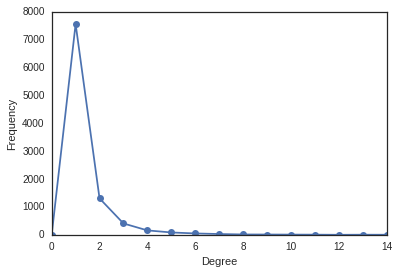

In [222]:
# Degree distribution
y=nx.degree_histogram(G)
plt.figure(1)
plt.plot(y,'b-',marker='o')
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.draw()
plt.show()

In [223]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as pl
pl.init_notebook_mode()
data = [go.Bar(
            x=range(np.max(degree_sequence)+1),
            y=y
    )]
layout = go.Layout(
    title = 'Degree Distribution',
        annotations=[
        dict(x=xi,y=yi,
             text=str(yi),
             xanchor='center',
             yanchor='bottom',
             showarrow=False,
        ) for xi, yi in zip(range(np.max(degree_sequence)+1), y)],
      xaxis=dict(
        title = 'Degree',
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Frequency',
        titlefont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        ))
)
fig = go.Figure(data=data, layout=layout)
pl.iplot(fig)

In [224]:
## most nodes have mainly one link, consumers have for the most one link to another shopper

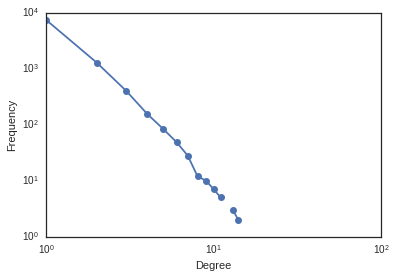

In [225]:
plt.figure(2)
plt.loglog(y,'b-',marker='o')
plt.ylabel("Frequency")
plt.xlabel("Degree")
plt.draw()
plt.show()

## log log shows degree follows a power law 

### Let's consider our Largest connected component

In [226]:
nx.center(GCC)

[2928]

    This center is apparently a single node, the center is the set of nodes with eccentricity equal to radius. Let's calculate its corresponding value

In [227]:
nodes[nodes['node']==2928]

,node,revenueYear
2927,2928,2102.72


    Using page rank to sort the nodes n the greatest connected component

In [228]:
## make sure page rank takes into account edge strength as weight
pr = nx.pagerank(G, weight = 'strength')
sorted_nodes = sorted([(node, pagerank) for node, pagerank in pr.items()], key=lambda x:pr[x[0]])

In [229]:
## identify the 20 users with the highest page rank in the largest connected component
for ind in sorted_nodes[:20]:
    print 'Revenue corresponding to customer number {0} is {1}'.format(ind[0],nodes[nodes['node']==ind[0]]['revenueYear'].values[0])

Revenue corresponding to customer number 3101 is 261.46
Revenue corresponding to customer number 1795 is 6058.78
Revenue corresponding to customer number 7853 is 2397.2
Revenue corresponding to customer number 701 is 481.15
Revenue corresponding to customer number 1171 is 1461.15
Revenue corresponding to customer number 8794 is 509.05
Revenue corresponding to customer number 6454 is 665.52
Revenue corresponding to customer number 5674 is 538.7
Revenue corresponding to customer number 5680 is 437.68
Revenue corresponding to customer number 3044 is 217.75
Revenue corresponding to customer number 8795 is 1012.95
Revenue corresponding to customer number 6790 is 1309.35
Revenue corresponding to customer number 9189 is 736.02
Revenue corresponding to customer number 9191 is 751.68
Revenue corresponding to customer number 5684 is 696.45
Revenue corresponding to customer number 6772 is 1152.5
Revenue corresponding to customer number 7495 is 2473.83
Revenue corresponding to customer number 6258

In [230]:
nodes[nodes['node']==ind[0]]['revenueYear'].values[0]

259.86000000000001

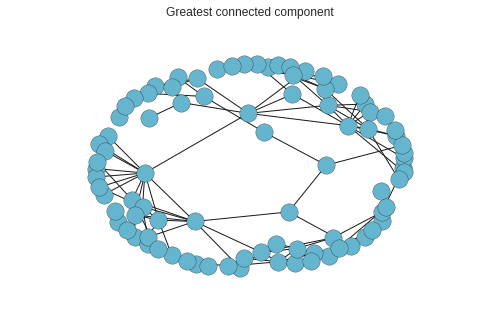

In [231]:
## Lets draw our geatest connected component
nx.draw(GCC, node_color='c',edge_color='k', arrows=True)
plt.title('Greatest connected component')

In [232]:
## calculate the maximal independant set in the network 
mis = nx.maximal_independent_set(G) 
print 'Size of the maximal independant set {0}'.format(len(mis))

Size of the maximal independant set 5187


In [233]:
## our graph G is not a connected graph, we can look at GCC
asp = nx.average_shortest_path_length(GCC, weight=None)

In [234]:
asp
## are we exposed to a small world phenomena ?

5.415360501567398

## Revenue
    let's spend some time on revenue analysis:
    * first: rank nodes by revenue

In [256]:
nodes.describe()['revenueYear']

count    9628.000000
mean      794.637039
std       678.045920
min        15.250000
25%       346.537500
50%       610.965000
75%      1031.950000
max      9894.690000
Name: revenueYear, dtype: float64

In [235]:
nodes.sort(columns= 'revenueYear', ascending = False).head()

,node,revenueYear
5154,5155,9894.69
7171,7172,8067.32
1970,1971,7895.29
1808,1809,7743.37
8854,8855,7157.12


In [236]:
components = list(nx.connected_components(G))
s = [len(c) for c in components]
data = [
    go.Histogram(
        x=nodes['revenueYear'],
        #histnorm='probability'
    )
]
layout = go.Layout(
    title = 'Revenue Distribution',


      xaxis=dict(
        title = 'Revenue',
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Frequency',
        titlefont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        ))
)
fig = go.Figure(data=data, layout=layout)
pl.iplot(fig)

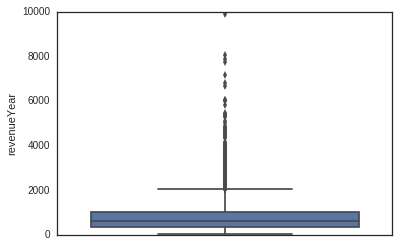

In [237]:
sns.boxplot( y="revenueYear", data=nodes)

In [238]:
nodes['revenueYear'].describe()

count    9628.000000
mean      794.637039
std       678.045920
min        15.250000
25%       346.537500
50%       610.965000
75%      1031.950000
max      9894.690000
Name: revenueYear, dtype: float64

In [239]:
## linking each customer to the number of co-shoppers


for index, row in nodes.iterrows():
    node = row['node']
    n_neighbors = len(G[node].keys())
    nodes.set_value(index, 'number_of_neighbors', n_neighbors)

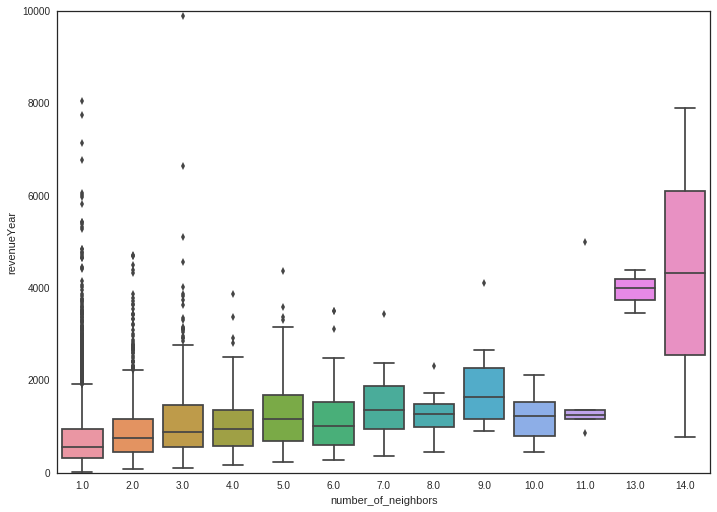

In [240]:
# We can look at an individual feature in Seaborn through a boxplot
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x='number_of_neighbors', y="revenueYear", data=nodes, ax = ax)

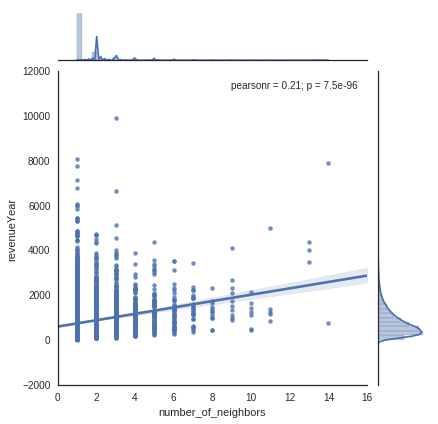

In [243]:
sns.jointplot(x='number_of_neighbors', y="revenueYear", data=nodes, size=6,  kind="reg")

# plt.title('Node Revenue vs Number of Node Neighbors')

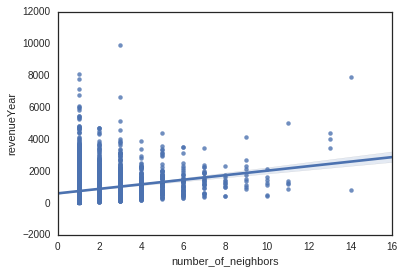

In [33]:
sns.regplot(x="number_of_neighbors", y="revenueYear", data=nodes)

In [244]:
## let's look at the number of neighbors of top 10 spenders
nodes.sort(columns= 'revenueYear', ascending = False).head(10)
## most of them have one neighbour

,node,revenueYear,number_of_neighbors
5154,5155,9894.69,3.0
7171,7172,8067.32,1.0
1970,1971,7895.29,14.0
1808,1809,7743.37,1.0
8854,8855,7157.12,1.0
8830,8831,6788.05,1.0
3960,3961,6657.39,3.0
1794,1795,6058.78,1.0
4990,4991,6026.10,1.0
2912,2913,5977.38,1.0


In [245]:
## adding another feature average strength and max strength of links


for index, row in nodes.iterrows():
    node = row['node']
    strengths = []
    for neighbor in G[node].keys():
        strength = G[node][neighbor]['strength']
        strengths.append(strength)
    max_strength = np.max(strengths)
    mean_strength= np.ceil(np.mean(strengths))
    median_strength = np.median(strengths)
    
    
    nodes.set_value(index, 'max_strength', max_strength)
    nodes.set_value(index, 'median_strength', median_strength)
    nodes.set_value(index, 'mean_strength', mean_strength)

In [246]:
## let's examine strength of relationships for top spenders
nodes.sort(columns= 'revenueYear', ascending = False).head(10)

,node,revenueYear,number_of_neighbors,max_strength,median_strength,mean_strength
5154,5155,9894.69,3.0,5.0,5.0,5.0
7171,7172,8067.32,1.0,5.0,5.0,5.0
1970,1971,7895.29,14.0,10.0,2.0,3.0
1808,1809,7743.37,1.0,1.0,1.0,1.0
8854,8855,7157.12,1.0,9.0,9.0,9.0
8830,8831,6788.05,1.0,3.0,3.0,3.0
3960,3961,6657.39,3.0,1.0,1.0,1.0
1794,1795,6058.78,1.0,1.0,1.0,1.0
4990,4991,6026.10,1.0,7.0,7.0,7.0
2912,2913,5977.38,1.0,3.0,3.0,3.0


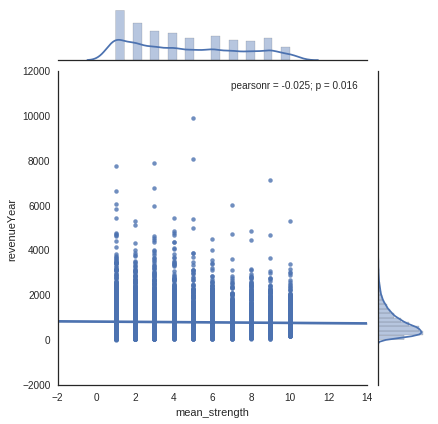

In [248]:
sns.jointplot(x='mean_strength', y="revenueYear", data=nodes, size=6, kind = 'reg')
# bof bof 

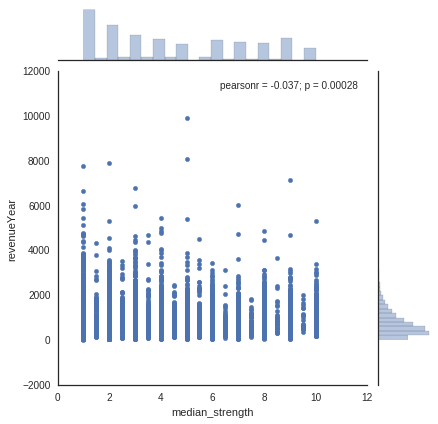

In [38]:
sns.jointplot(x='median_strength', y="revenueYear", data=nodes, size=6)
# bof bof 

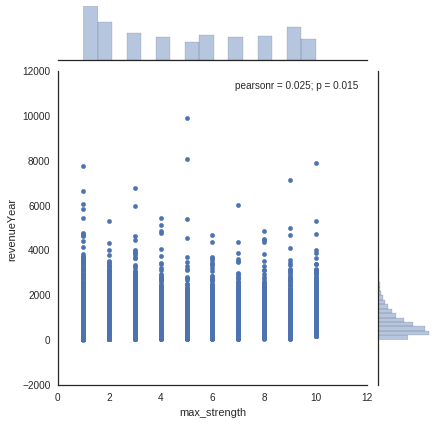

In [39]:
sns.jointplot(x='max_strength', y="revenueYear", data=nodes, size=6)
# bof bof 

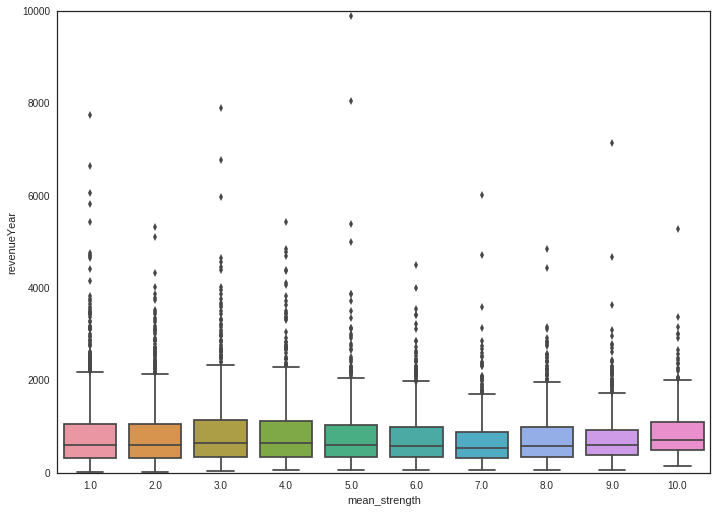

In [40]:
# We can look at an individual feature in Seaborn through a boxplot
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x='mean_strength', y="revenueYear", data=nodes, ax = ax)

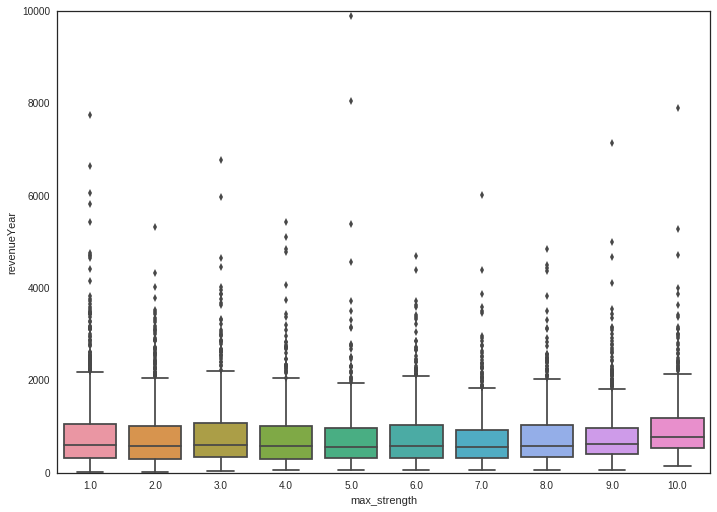

In [41]:
# We can look at an individual feature in Seaborn through a boxplot
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x='max_strength', y="revenueYear", data=nodes, ax = ax)

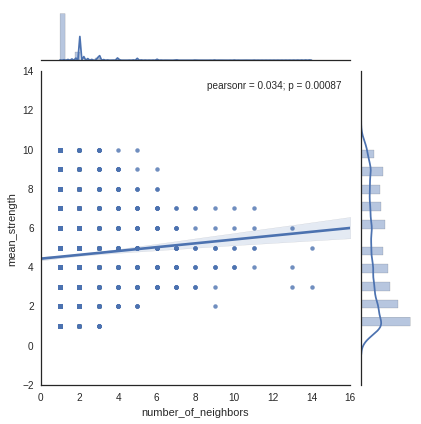

In [251]:
sns.jointplot(y='mean_strength', x="number_of_neighbors", data=nodes, size=6, kind = 'reg')
# bof bof 

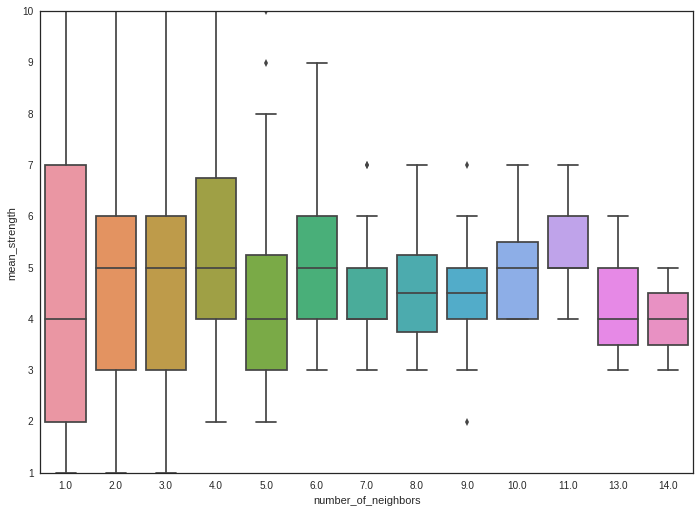

In [252]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x='number_of_neighbors', y="mean_strength", data=nodes, ax = ax)

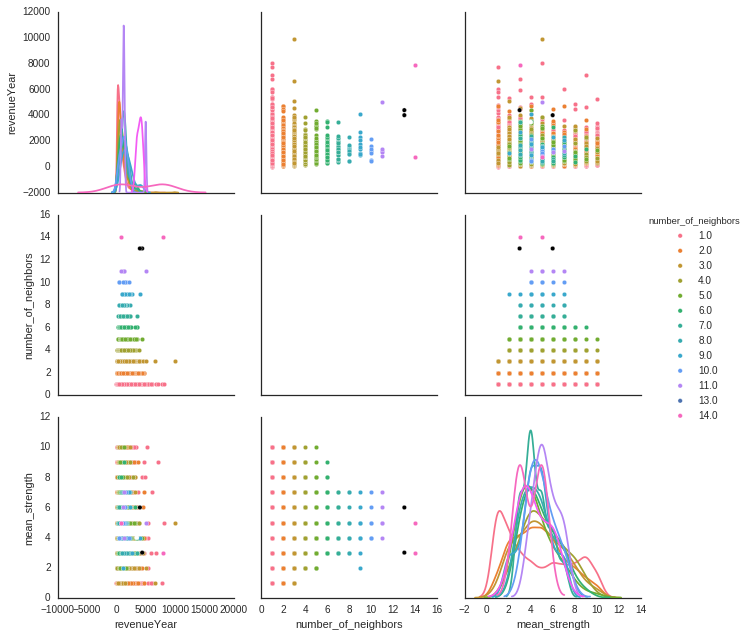

In [42]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# 
sns.set(style="white", color_codes=True)
sns.pairplot(nodes.drop(['node', 'max_strength', 'median_strength'], axis =1), hue="number_of_neighbors", size=3, diag_kind="kde")

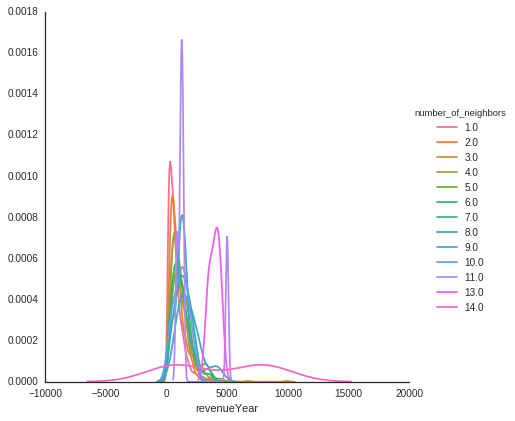

In [43]:
sns.FacetGrid(nodes, hue="number_of_neighbors", size=6) \
   .map(sns.kdeplot, "revenueYear") \
   .add_legend()

In [44]:
## let's take a look at average spending of coshoppers
## adding another feature average strength and max strength of links


for index, row in nodes.iterrows():
    node = row['node']
    spending = []
    for neighbor in G[node].keys():
        spend = nodes[nodes['node'] == neighbor]['revenueYear'].values[0]
        spending.append(spend)
    max_spending = np.max(spending)
    mean_spending= np.ceil(np.mean(spending))
    median_spending = np.median(spending)
    
    
    nodes.set_value(index, 'max_coshopper_spending', max_spending)
    nodes.set_value(index, 'median_coshopper_spending', median_spending)
    nodes.set_value(index, 'mean_coshopper_spending', mean_spending)

In [45]:
nodes.sort(columns= 'revenueYear', ascending = False).head(10)
## top shoppers do not coshop with top shoppers

,node,revenueYear,number_of_neighbors,max_strength,median_strength,mean_strength,max_coshopper_spending,median_coshopper_spending,mean_coshopper_spending
5154,5155,9894.69,3.0,5.0,5.0,5.0,1053.31,601.860,643.0
7171,7172,8067.32,1.0,5.0,5.0,5.0,188.90,188.900,189.0
1970,1971,7895.29,14.0,10.0,2.0,3.0,3440.04,1670.655,1672.0
1808,1809,7743.37,1.0,1.0,1.0,1.0,1229.90,1229.900,1230.0
8854,8855,7157.12,1.0,9.0,9.0,9.0,396.71,396.710,397.0
8830,8831,6788.05,1.0,3.0,3.0,3.0,799.45,799.450,800.0
3960,3961,6657.39,3.0,1.0,1.0,1.0,1068.66,592.800,693.0
1794,1795,6058.78,1.0,1.0,1.0,1.0,1311.95,1311.950,1312.0
4990,4991,6026.10,1.0,7.0,7.0,7.0,158.81,158.810,159.0
2912,2913,5977.38,1.0,3.0,3.0,3.0,2792.65,2792.650,2793.0


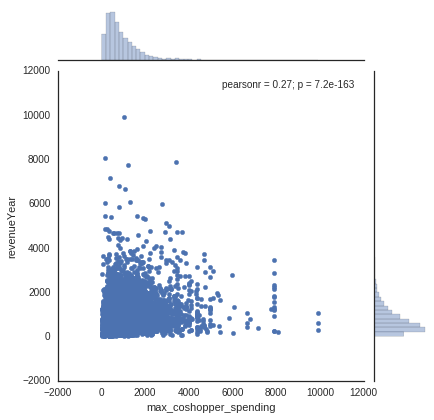

In [46]:
sns.jointplot(x='max_coshopper_spending', y="revenueYear", data=nodes, size=6)
# bof bof 

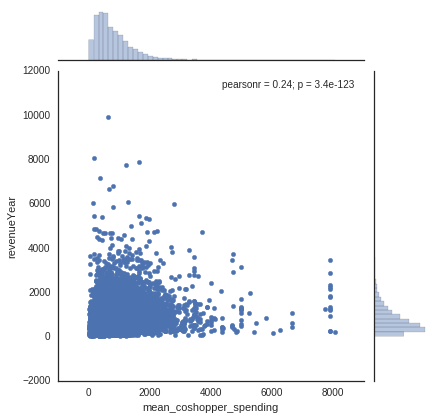

In [47]:
sns.jointplot(x='mean_coshopper_spending', y="revenueYear", data=nodes, size=6)
# bof bof 

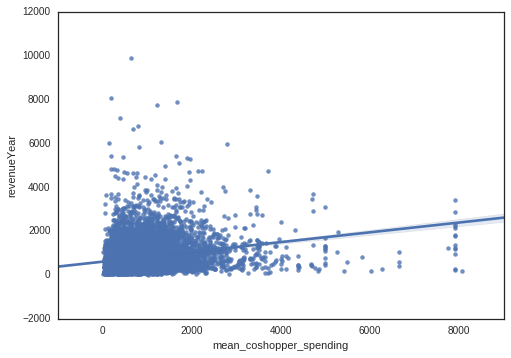

In [48]:
sns.regplot(x="mean_coshopper_spending", y="revenueYear", data=nodes)

In [49]:
## let's consider revenue of strongest relationship
for index, row in nodes.iterrows():
    node = row['node']
    spending = []
    strengths = []
    n_neighbors= []
    for neighbor in G[node].keys():
        spend = nodes[nodes['node'] == neighbor]['revenueYear'].values[0]
        n_neighbor = nodes[nodes['node'] == neighbor]['number_of_neighbors'].values[0]
        strength = G[node][neighbor]['strength']
        spending.append(spend)
        strengths.append(strength)
        n_neighbors.append(n_neighbor)
    neighbors = pd.DataFrame(index =G[node].keys(),data = np.array([strengths,spending,n_neighbors]).T ,columns = ['strength','spend', 'n_neighbors'] )
    average_n_neighbors_of_relations =  neighbors['n_neighbors'].mean()  
    revenue_strongest_relationship = neighbors.sort(columns = 'strength', ascending = False).iloc[0,1]
    revenue_weakest_relationship = neighbors.sort(columns = 'strength', ascending = False).iloc[-1,1]
    
    
    nodes.set_value(index, 'revenue_strongest_relationship',revenue_strongest_relationship)
    nodes.set_value(index, 'revenue_weakest_relationship', revenue_weakest_relationship)
    nodes.set_value(index, 'average_n_neighbors_of_relations', average_n_neighbors_of_relations)

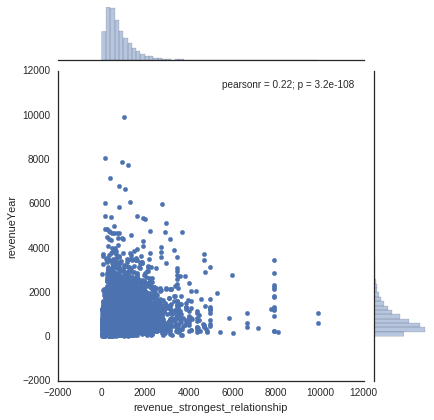

In [50]:
sns.jointplot(x='revenue_strongest_relationship', y="revenueYear", data=nodes, size=6)

In [257]:
def getNNeighbors(node):
    return nodes[nodes['node'] == node]['number_of_neighbors'].values[0]

def getRevenue(node):
    return nodes[nodes['node'] == node]['revenueYear'].values[0]

## How balanced are relationships? Are customers often paired with others who have similar number of friends, or is it typically one sided


In [258]:
#How balanced are relationships? Are customers often paired with others who have similar number of friends, or is it typically one sided
links['n_neighbors_start_node'] = links['fromNode'].apply(lambda x: getNNeighbors(x) )
links['n_neighbors_end_node'] = links['toNode'].apply(lambda x: getNNeighbors(x) ) 

links['revenue_start_node'] = links['fromNode'].apply(lambda x: getRevenue(x) )
links['revenue_end_node'] = links['toNode'].apply(lambda x: getRevenue(x) )    

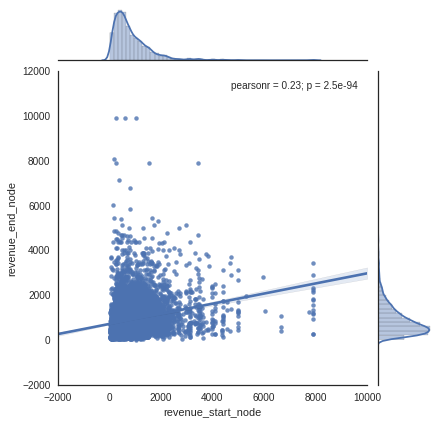

In [259]:
sns.jointplot(x='revenue_start_node', y="revenue_end_node", data=links, size=6, kind = 'reg')

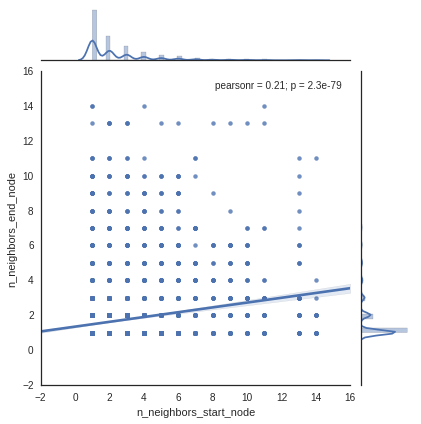

In [261]:
sns.jointplot(x='n_neighbors_start_node', y="n_neighbors_end_node", data=links, size=6, kind = 'reg')

In [263]:
links['diff_friend'] = np.abs(links['n_neighbors_start_node'] -links['n_neighbors_end_node'] )

In [277]:

data = [
    go.Histogram(
        x=links['diff_friend'],
        #histnorm='probability'
    )
]
layout = go.Layout(
    title = 'Distribution of difference between # neighbors',


      xaxis=dict(
        title = 'difference between # neighbors',
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Probability',
        titlefont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=12,
            color='rgb(107, 107, 107)'
        ))
)
fig = go.Figure(data=data, layout=layout)
pl.iplot(fig)

In [271]:
max(links['diff_friend'].value_counts())

3193

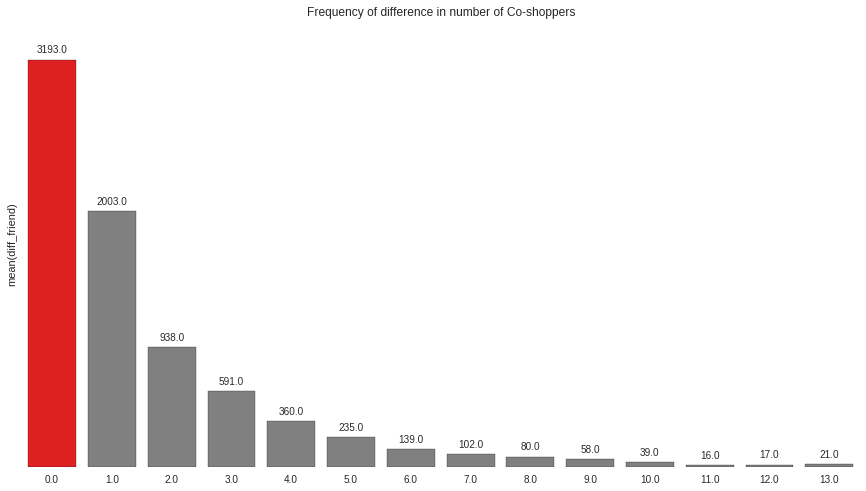

In [275]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
b = sns.barplot(x=links['diff_friend'].value_counts().index, y=links['diff_friend'].value_counts(), ax = ax, palette=clrs)

for p in b.patches:
    b.annotate(
        s='{:.1f}'.format(p.get_height()),
        xy=(p.get_x()+p.get_width()/2.,p.get_height()),
        ha='center',va='center',
        xytext=(0,10),
        textcoords='offset points'
)

b.set_yticks([])
sns.despine(ax=b, left=True, bottom=True)
sns.plt.title('Frequency of difference in number of Co-shoppers')


    66.5% of the graph have a difference of one, two neighbors with their neighboring nodes; the graph is balanced 

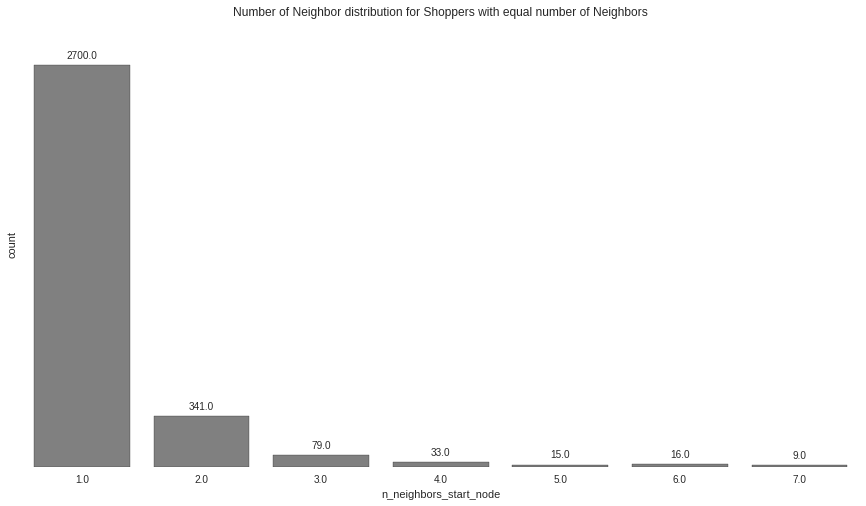

In [284]:
## let's look at links with zero differce
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
s = links[links['diff_friend'] ==0][['n_neighbors_start_node']]
b = sns.countplot(x='n_neighbors_start_node', data=s, ax = ax, color = 'grey')
for p in b.patches:
    b.annotate(
        s='{:.1f}'.format(p.get_height()),
        xy=(p.get_x()+p.get_width()/2.,p.get_height()),
        ha='center',va='center',
        xytext=(0,10),
        textcoords='offset points'
)

b.set_yticks([])
sns.despine(ax=b, left=True, bottom=True)
sns.plt.title('Number of Neighbor distribution for Shoppers with equal number of Neighbors')

In [57]:
## most of the balanced nodes only have one edge in the network, people tend to shop in couples

## Are there links between the size / strength of networks and certain zip codes and neighborhood-types in Seattle?

In [58]:
links.head()

,fromNode,toNode,zip,strength,n_neighbors_start_node,n_neighbors_end_node,revenue_start_node,revenue_end_node,diff_friend
0,1,792,98101,8,6.0,7.0,303.31,438.54,1.0
1,1,4867,98101,6,6.0,2.0,303.31,177.60,4.0
2,1,4868,98101,7,6.0,2.0,303.31,301.65,4.0
3,1,4869,98101,6,6.0,2.0,303.31,496.30,4.0
4,1,24,98101,2,6.0,3.0,303.31,100.75,3.0


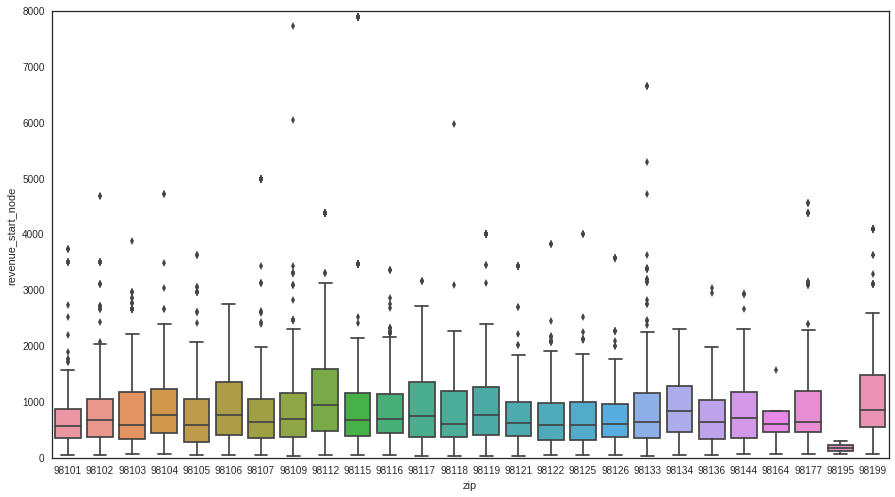

In [59]:
# We can look at an individual feature in Seaborn through a boxplot
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)
sns.boxplot(x='zip', y="revenue_start_node", data=links, ax = ax)

In [60]:
## highest average spend zip code: 98112
## lowest average spend zip code: 98195


In [61]:
newlinks = links.drop_duplicates(subset = 'fromNode')
nodes_zip = newlinks.groupby(newlinks['zip']).count()['fromNode']

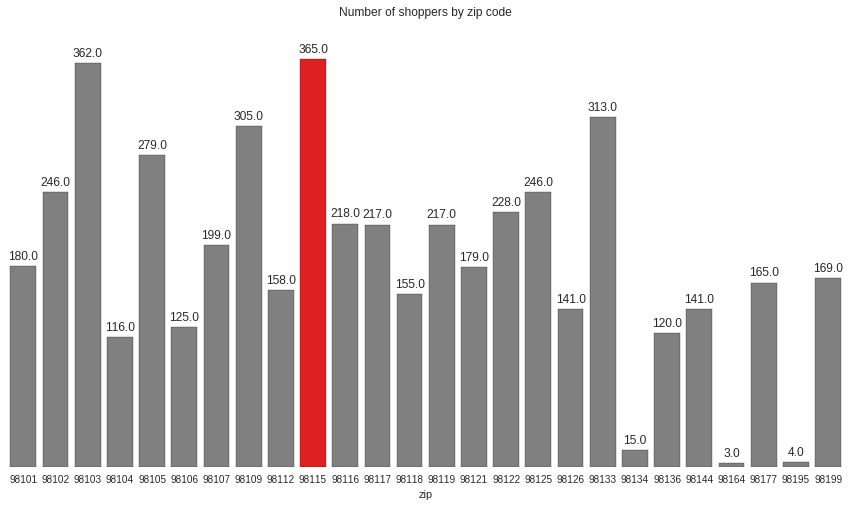

In [62]:
## count number of nodes in each area
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
clrs = ['grey' if (x < max(list(nodes_zip.values)))else 'red' for x in list(nodes_zip.values) ]
b = sns.barplot(nodes_zip.index,
                nodes_zip.values,
                 ax = ax, palette=clrs)

for p in b.patches:
    b.annotate(
        s='{:.1f}'.format(p.get_height()),
        xy=(p.get_x()+p.get_width()/2.,p.get_height()),
        ha='center',va='center',
        xytext=(0,10),
        textcoords='offset points'
)

b.set_yticks([])
sns.despine(ax=b, left=True, bottom=True)
sns.plt.title('Number of shoppers by zip code')
## TODO add a blue color to smallest 


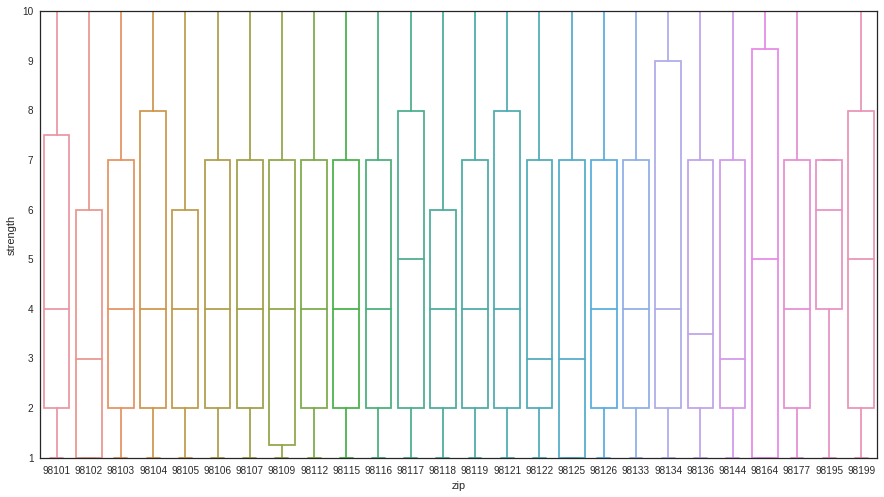

In [85]:
# We can look at an individual feature in Seaborn through a boxplot
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
               medians='DarkBlue', caps='Gray')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)
sns.boxplot(x='zip', y="strength", data=links, ax = ax)

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

In [63]:

## needto normalize by number of nodes to get average spend in zip 
sum_revenue_zip =newlinks.groupby(newlinks['zip']).sum()['revenue_start_node']
mean_revenue_zip =newlinks.groupby(newlinks['zip']).mean()['revenue_start_node']



# fig, ax = plt.subplots()
# fig.set_size_inches(15, 8)
# b = sns.barplot(mean_revenue_zip.index,
#                 mean_revenue_zip.values,
#                  ax = ax)


## Get Connected components' zip codes

In [129]:
Gcc=sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)

## consider bigggest connected component 
layout=nx.spring_layout
G0=Gcc[0]

G0edges = G0.edges()
G0links = pd.DataFrame()
i = 0
for edge in G0edges:
    newdf = links[((links['fromNode']== edge[0]) &(links['toNode']== edge[1])) |((links['toNode']== edge[0]) &(links['fromNode']== edge[1]))]
    G0links = pd.concat([G0links, newdf  ], axis = 0)
#     if newdf.shape[0] >1:
#         print(newdf)
#     print(G0links.shape)

In [130]:
G0links.head()

,fromNode,toNode,zip,strength,n_neighbors_start_node,n_neighbors_end_node,revenue_start_node,revenue_end_node
2503,1540,6532,98109,1,3.0,3.0,834.40,1451.35
2504,1540,6533,98109,2,3.0,1.0,834.40,858.22
2502,1540,5030,98109,4,3.0,7.0,834.40,2386.55
2530,1549,1656,98109,2,3.0,1.0,2229.40,922.73
2698,1656,1549,98109,2,1.0,3.0,922.73,2229.40


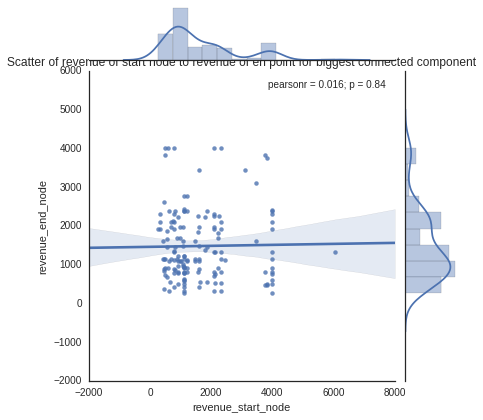

In [133]:
sns.jointplot(x='revenue_start_node', y="revenue_end_node", data=G0links, size=6,  kind="reg")
sns.plt.title('Scatter of revenue of start node to revenue of en point for biggest connected component')

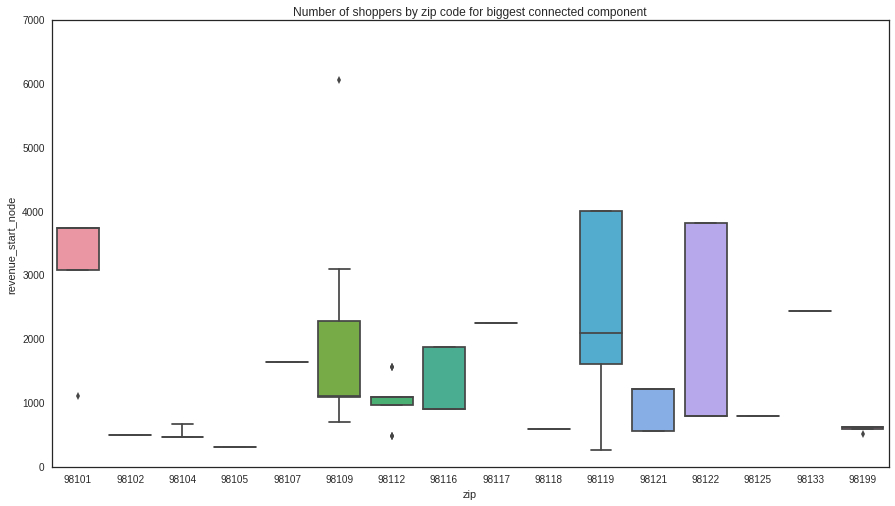

In [134]:
# We can look at an individual feature in Seaborn through a boxplot
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)
sns.boxplot(x='zip', y="revenue_start_node", data=G0links, ax = ax)
sns.plt.title('Number of shoppers by zip code for biggest connected component')

In [141]:
## creating sub networks by zip code and validating propreties

for zips in links['zip'].unique():
    print("------------------------------------------")
    print("Processing for zip {0}").format(zips)
    links_zip = links[links['zip'] == zips]
    Gzip=nx.from_pandas_dataframe(links_zip, 'fromNode', 'toNode', ['strength'])
# Network Characteristics
    print 'Number of nodes:', Gzip.number_of_nodes() 
    print 'Number of edges:', Gzip.number_of_edges() 
    print 'Number of connected components:', nx.number_connected_components(Gzip)
    print "Average strength ", links_zip['strength'].mean()
    print "Average Revenue of start and end nodes ", ((links_zip['revenue_start_node'] + links_zip['revenue_end_node'])/2).mean()
    # Degree
    degree_sequence = Gzip.degree().values()
    print "Min degree ", np.min(degree_sequence)
    print "Max degree ", np.max(degree_sequence)
    print "Median degree ", np.median(degree_sequence)
    print "Mean degree ", np.mean(degree_sequence)

------------------------------------------
Processing for zip 98101
Number of nodes: 434
Number of edges: 266
Number of connected components: 171
Average strength  4.58181818182
Average Revenue of start and end nodes  781.7718
Min degree  1
Max degree  6
Median degree  1.0
Mean degree  1.22580645161
------------------------------------------
Processing for zip 98102
Number of nodes: 563
Number of edges: 355
Number of connected components: 212
Average strength  4.09788359788
Average Revenue of start and end nodes  903.504814815
Min degree  1
Max degree  7
Median degree  1.0
Mean degree  1.26110124334
------------------------------------------
Processing for zip 98103
Number of nodes: 845
Number of edges: 525
Number of connected components: 328
Average strength  4.60181818182
Average Revenue of start and end nodes  828.8447
Min degree  1
Max degree  10
Median degree  1.0
Mean degree  1.2426035503
------------------------------------------
Processing for zip 98104
Number of nodes: 312
Num

In [181]:
h, a = nx.hits(G, max_iter=1000)

import operator
#http://www.math.cornell.edu/~mec/Winter2009/RalucaRemus/Lecture4/lecture4.html
authority_sort = sorted([(node, authority) for node, authority in a.items()], key=operator.itemgetter(1), reverse = True)
hubness_sort = sorted([(node, hubness) for node, hubness in h.items()], key=operator.itemgetter(1), reverse = True)

authority_sort

hubness_sort

Pearson correlation coefficient  (0.19217709698176186, 9.2505997433028527e-81)


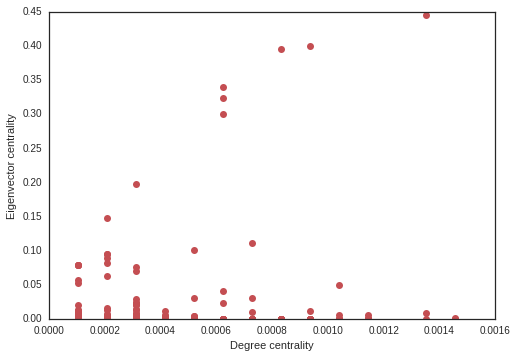

In [168]:
# Centrality measures

# Degree centrality
deg_centrality = nx.degree_centrality(G)

# Eigenvector centrality
eig_centrality = nx.eigenvector_centrality(G)

# Sort centrality values
sorted_deg_centrality = sorted(deg_centrality.items())
sorted_eig_centrality = sorted(eig_centrality.items())

# Extract centralities
deg_data=[b for a,b in sorted_deg_centrality]
eig_data=[b for a,b in sorted_eig_centrality]

# Compute Pearson correlation coefficient
from scipy.stats.stats import pearsonr
print "Pearson correlation coefficient ", pearsonr(deg_data, eig_data)

# Plot correlation between degree and eigenvector centrality
plt.figure(4)
plt.plot(deg_data, eig_data, 'ro')
plt.xlabel('Degree centrality')
plt.ylabel('Eigenvector centrality')
plt.draw()
plt.show()

## Community detection

focus on the community detection (or clustering) problem in
graphs. Typically, a community corresponds to a set of nodes that highly interact among each other,
compared to the intensity of interactions (as expressed by the number of edges) with the rest nodes of
the graph

In [179]:
from scipy.cluster import hierarchy
from scipy.spatial import distance

path_length = nx.all_pairs_shortest_path_length(G)
n = len(G.nodes())
distances = np.zeros((n,n))

for u,p in path_length.iteritems():
    for v,d in p.iteritems():
        distances[int(u) -1][int(v)-1] = d
        
hier = hierarchy.average(distances)

## Authority and Hubness for undirected Graphs

In [192]:

class create_graph:
    def __init__(self):

        self.Network = links
        self.graph = np.asarray(self.Network[['fromNode', 'toNode']])
        self.nodes = np.unique(self.graph)
        self.weights = list(map(float, self.Network['strength']))

 

    def networkList(self):

        G = nx.DiGraph()

        for node in self.nodes:

            G.add_node(node)

 

        self.graph_l = []

        for edge in self.graph:

            G.add_edge(edge[0], edge[1])

            self.graph_l.append((edge[0], edge[1]))

 

        labels = dict(list(zip(self.graph_l, self.weights)))

        return G, labels


In [199]:
gr = create_graph()
graph = gr.graph
G, labels = gr.networkList()



In [200]:
nx.is_directed(G)

True

In [202]:
h, a = nx.hits(G, max_iter=1000)

import operator
#http://www.math.cornell.edu/~mec/Winter2009/RalucaRemus/Lecture4/lecture4.html
authority_sort = sorted([(node, authority) for node, authority in a.items()], key=operator.itemgetter(1), reverse = True)
hubness_sort = sorted([(node, hubness) for node, hubness in h.items()], key=operator.itemgetter(1), reverse = True)



hubness_sort

[(2926, 0.1868058044870279),
 (1510, 0.14600509337006723),
 (2928, 0.14459977605758328),
 (3552, 0.12071269015897225),
 (925, 0.07101427448947317),
 (1534, 0.0350261755648858),
 (1563, 0.0305358698945186),
 (3101, 0.027882863084088473),
 (2811, 0.0268012522672877),
 (1795, 0.026383244504679805),
 (1815, 0.022179437102619624),
 (3148, 0.018607999632543278),
 (4766, 0.0182563438991688),
 (4714, 0.01314340305207631),
 (2357, 0.012703429226957033),
 (1540, 0.012657395129932343),
 (2931, 0.012624716765002009),
 (120, 0.011088240830089148),
 (1516, 0.01073196085031022),
 (1835, 0.009774756198164125),
 (1846, 0.006874455480676831),
 (2338, 0.00648048519436166),
 (2759, 0.0063119080669535406),
 (798, 0.005748724790286518),
 (2949, 0.0024306780657039435),
 (1509, 0.0023792017042474846),
 (3326, 0.0014612307934067502),
 (2959, 0.0013960094689980198),
 (3153, 0.0012077636534365296),
 (1696, 0.0010346685967059237),
 (1838, 0.0008568506776933),
 (4249, 0.0008362817631532739),
 (2995, 0.000821145840

In [203]:
authority_sort

[(5899, 0.1009767489230793),
 (6468, 0.0955459361576662),
 (2928, 0.08041304492177767),
 (1510, 0.07578575313726856),
 (3552, 0.06916206573430189),
 (2926, 0.06611466866226316),
 (6467, 0.04821402296254093),
 (925, 0.04209967263039324),
 (5030, 0.040155650692036936),
 (7773, 0.030945067020418174),
 (6487, 0.03017146923617442),
 (2811, 0.02706239310390864),
 (4766, 0.02706239310390864),
 (7852, 0.02706239310390864),
 (7853, 0.02706239310390864),
 (7854, 0.02706239310390864),
 (6466, 0.026225841201616983),
 (6850, 0.022858339697046304),
 (1563, 0.02094804277176096),
 (5726, 0.018320354301790458),
 (6774, 0.006847662405214426),
 (2338, 0.005908840197224345),
 (6775, 0.005908840197224345),
 (1815, 0.0055386200751454595),
 (3033, 0.005074211342984697),
 (3148, 0.0044966106788215405),
 (6773, 0.004151937814021421),
 (6532, 0.0038489680496044906),
 (1516, 0.003747013740772896),
 (2949, 0.0033836614068956093),
 (4714, 0.00321311560603134),
 (6771, 0.00321311560603134),
 (6772, 0.00321311560603

False